# Datasets and variables using numpy, matplotlib and pandas

*Requirements*: 
Your jupyter notebook should run in an environment with:
- `pandas`
- `numpy`
- `matplotlib`
- `seaborn`

## Introduction to numpy

Full documentation is available [here](https://numpy.org/) and introduction tutorials are available [here](https://numpy.org/learn/).

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by **a tuple of non-negative integers**. In NumPy dimensions are called **axes**.

### Arrays

In [1]:
import numpy as np

In [2]:
one_dimensional = np.array([1, 2, 3])
two_dimensional = np.array([[1, 2, 3], [4, 5, 6]])

Axes can be accessed by their index:

In [3]:
# Row access
print(two_dimensional[1,:])

# Column access
print(two_dimensional[:,1])

[4 5 6]
[2 5]


#### Exercise:
Write a function that returns the value at index `row_ix` for the row and `col_ix` for the column.


In [4]:
def array_indexer(input_array, row_ix, col_ix):
    """Returns the value at row_ix and col_ix for input_array.
    """

### Masking
Masking allows to select only values from an array according to an array of booleans.

In [5]:
# Compare array values to a set value
mask = two_dimensional > 2
mask

array([[False, False,  True],
       [ True,  True,  True]])

In [6]:
# Get values of the array respecting this mask
two_dimensional[mask]

array([3, 4, 5, 6])

## Computing statistical indicators
Numpy comes with lots of functions to compute statistical indicators, either overall the values, or overcolumns and rows.

In [7]:
# Over columns
print(np.mean(two_dimensional, axis=1))

# Over rows
print(np.mean(two_dimensional, axis=0))

# Overall
print(np.mean(two_dimensional))

[2. 5.]
[2.5 3.5 4.5]
3.5


### Exercices: 
Compute the standard error and the median for each row/column of the array `two_dimensional`.

## Plotting using matplotlib
> Add the matplotlib library to your virtual environment `pip install matplotlib`

Matplotlib is a module for generating 2D and 3D graphics. Documentation is available [here](https://matplotlib.org/api/pyplot_summary.html). A set of tutorials are available [here](https://matplotlib.org/stable/tutorials/index.html).

Matplotlib is both **complex** and **very powerful**, so it may take a while for you to learn its full power.

In [8]:
# Generate a random vector for plotting
random_vector = np.random.normal(0, 10, 1000)

### Plotting an histogram

In [9]:
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Histogram of a random vector')

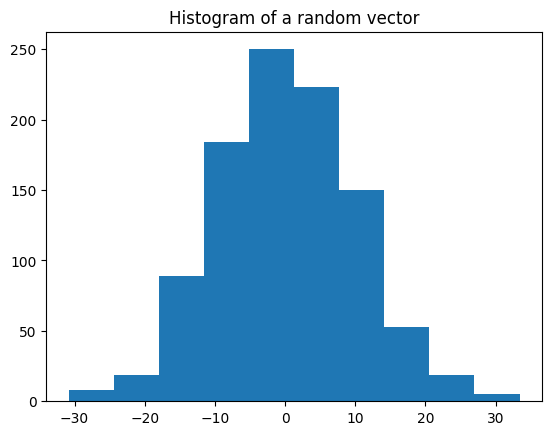

In [10]:
plt.hist(x=random_vector)
plt.title("Histogram of a random vector")

#### Exercice:
Add the labels for the x axis and the y axis on the above plot.

### Plotting a boxplot

Text(0.5, 1.0, 'Boxplot of a random vector')

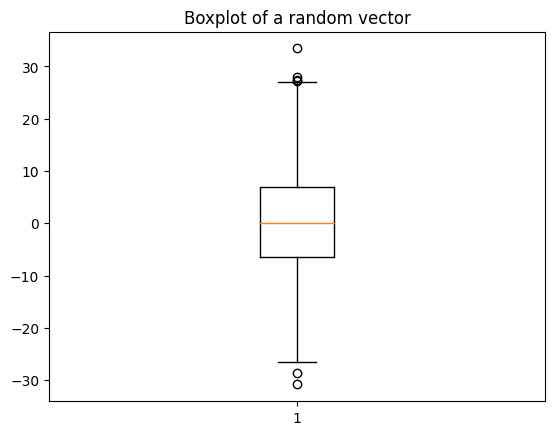

In [11]:
plt.boxplot(x=random_vector)
plt.title("Boxplot of a random vector")

#### Exercice:
Using the same data vector, plot a [violin plot] and play with the different options (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html).

### Scatter plots
To plot the repartition of two numerical variables, **scatter plots** can be used.

In [12]:
random_vector_1 = np.random.normal(0, 10, 1000)
random_vector_2 = np.random.normal(0, 10, 1000)

Text(0, 0.5, 'Vector 2')

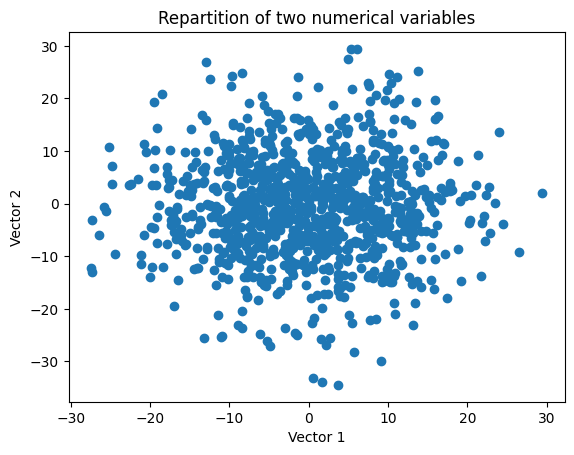

In [13]:
plt.scatter(random_vector_1, random_vector_2)
plt.title("Repartition of two numerical variables")
plt.xlabel("Vector 1")
plt.ylabel("Vector 2")

## Introduction to pandas

Pandas is a very easy to use library for data manipulation (but it can be tricky, because it's so easy to use you'll only rely on pandas afterwards even though it's **slower**).
Full documentation of pandas is [here](https://pandas.pydata.org/) and introduction is [here](https://pandas.pydata.org/docs/user_guide/10min.html).

### Dataframes
Dataframes (and Series, their one dimensional counterparts) is the pandas class that holds multi-dimensional data.

In [14]:
import pandas as pd

df = pd.DataFrame({"col_0": random_vector_1, "col_1": random_vector_2})

In [15]:
type(df)

pandas.core.frame.DataFrame

Dataframes can be indexed by its location or by its index.

In [16]:
# By column name
df["col_0"]
df.col_0

# By index of column
df.iloc[:,0]

0     -10.085572
1       0.857907
2      13.477652
3       4.821863
4      -2.080518
         ...    
995    -5.278665
996     3.347787
997    -4.957817
998    -3.429565
999   -15.467403
Name: col_0, Length: 1000, dtype: float64

The numpy array can be accessed using the `values` attribute (**it will be important for further labs and for matplotlib**).

In [17]:
df.values

array([[-10.08557156,   9.79882447],
       [  0.85790728,  13.32518313],
       [ 13.47765208,  19.27865925],
       ...,
       [ -4.95781729,   5.38388385],
       [ -3.42956527,   2.20295048],
       [-15.46740312,  -7.60342737]])

### Computing statistical indicators

A generic describes method is available to compute at once all the statistical estimators on a dataset.

In [18]:
df.describe()

,col_0,col_1
count,1000.000000,1000.000000
mean,-0.312998,-0.520898
std,9.647189,9.889622
min,-27.440159,-34.455849
25%,-7.158880,-6.821238
50%,-0.276919,-0.637538
75%,6.509656,5.941260
max,29.391993,29.417994


#### Exercice:
Compute all the estimators available using pandas `describe` method with `numpy`.

## Plotting using seaborn
[Seaborn](https://seaborn.pydata.org/) is a high-level library, built on top of `matplotlib` for easy plotting of `pandas` dataframe. It helps make beautiful plots very quickly.

In [19]:
import seaborn as sns

### Boxplots

Text(0.5, 1.0, 'Repartition of column 0')

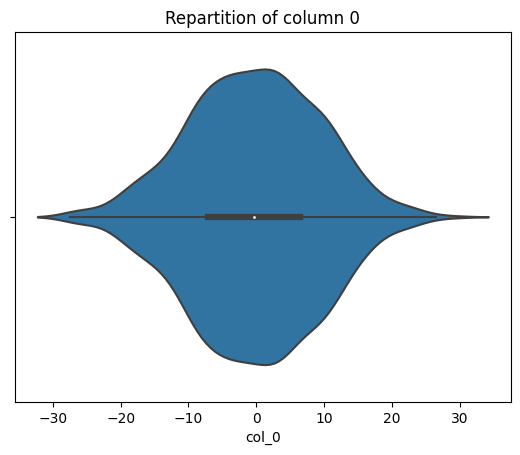

In [24]:
sns.violinplot(data=df, x="col_0").set_title("Repartition of column 0")

**Exercice**: plot the same boxplot in color red.

## Histograms

Text(0.5, 1.0, 'Repartition of column 0')

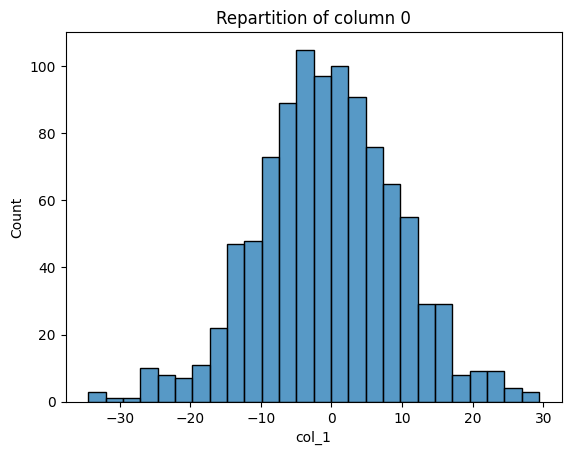

In [27]:
sns.histplot(data=df, x="col_1").set_title("Repartition of column 0")

**Exercice**: set the bin width to 10 and interprete the results.

### Scatterplots and curve estimation

<AxesSubplot: xlabel='col_0', ylabel='col_1'>

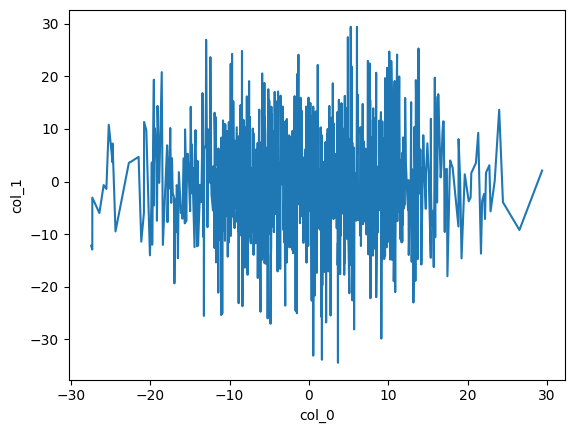

In [22]:
sns.lineplot(data=df, x="col_0", y="col_1")

<AxesSubplot: xlabel='col_0', ylabel='col_1'>

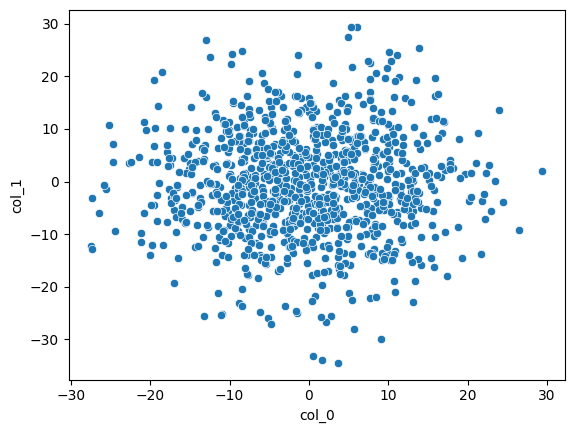

In [23]:
sns.scatterplot(data=df, x="col_0", y="col_1")

**Exercice**: Add a title to the plot.